<a href="https://colab.research.google.com/github/thomasshin/NLP_Study/blob/main/Pytorch_Practices/Pytorch_practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

#Running Tensors and Pytorch objects on the GPUs (faster computations)
GPU = faster computation on numbers thanks to CUDA + NVIDIA Hardware + PyTorch working behind the scenes.

Getting a GPU
1. Google Colab (free GPU)
2. Purchase GPU
3. Use cloud computing such as GCP, Azure, AWS...

In [2]:
!nvidia-smi

Wed Oct 25 03:53:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#2. Check for GPU access with PyTorch

In [3]:
#Check for GPU access with pytorch
torch.cuda.is_available()

True

In [4]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
#Count number of devices
torch.cuda.device_count()

1

#3. Putting tensors (and models) on the GPU
The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [6]:
# default : cpu
tensor = torch.tensor([1,2,3])

# tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [7]:
#move tensor to GPU
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

#4. Moving tensors back to CPU (for numpy)

In [8]:
#if tensor is on GPU, cannot transform it to numpy
tensor_on_gpu.cpu().numpy()

array([1, 2, 3])

In [9]:
tensor_on_gpu.cpu().numpy()

array([1, 2, 3])

#PyTorch Workflow

In [10]:
import torch
from torch import nn #nn contains all the building block for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

#1. Data(preparing and loading)

In [11]:
#linear regression
#create known param
weight = 0.7
bias = 0.3
#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

#Splitting train/test dataset

In [12]:
#create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_test), len(X_train), len(y_train), len(y_test)

(10, 40, 40, 10)

In [13]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = "Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Predictions")

  plt.legend(prop={"size" : 14});

In [14]:
#Create a Linear Regression model class
#PyTorch loves float32 by default
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  #Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

#Checking the contents of a PyTorch model

In [15]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#Prediction using torch.inference_mode()

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

In older PyTorch code, you may also see torch.no_grad() being used for inference. While torch.inference_mode() and torch.no_grad() do similar things,

torch.inference_mode() is newer, potentially faster and preferred. See this Tweet from PyTorch for more.

In [17]:
#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [18]:
X_test.shape, y_test.shape

(torch.Size([10, 1]), torch.Size([10, 1]))

In [19]:
y_preds.shape, y_test.shape

(torch.Size([10, 1]), torch.Size([10, 1]))

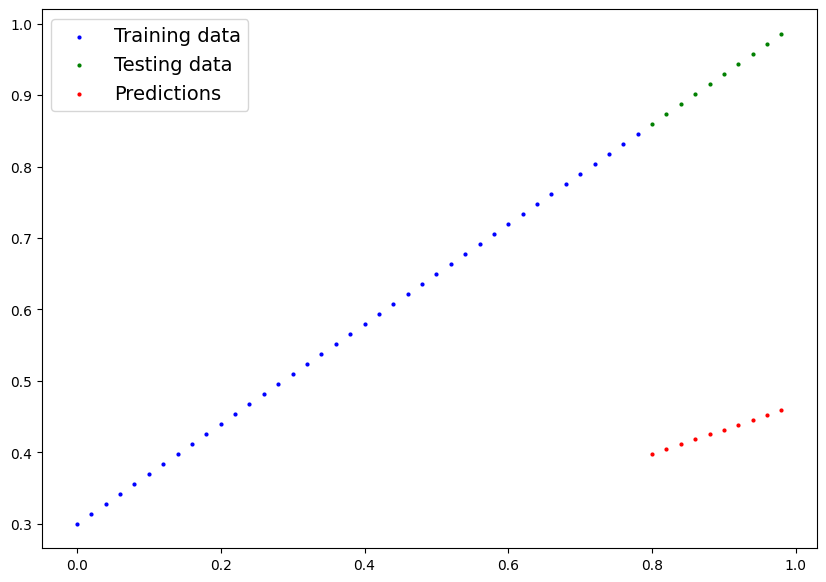

In [20]:
plot_predictions(predictions=y_preds)

#Train our model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

**Loss function**: Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.

**Optimizer**: Tells your model how to update its internal parameters to best lower the loss.

We need:

A Training Loop

A Testing Loop

In [21]:
#loss function
loss_fn = nn.L1Loss() #MAE loss
#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

In [22]:
y_preds.shape, y_test

(torch.Size([10, 1]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

#PyTorch Training Loop

In [23]:
torch.manual_seed(42)
epochs = 100
train_loss_value = []
test_loss_value = []
epoch_count = []

for epoch in range(epochs): #Pass the data through the model for a number of epochs(e.g. 100 for 100 passes of the data)
  #training mode (default state)
  model_0.train()
  #Pass the data through the model, this will perform the forward () method located within the model object
  y_preds = model_0(X_train)
  #calculate the loss with loss function
  loss = loss_fn(y_preds, y_train)
  #Zero the optimizer gradients (they accumulate every epoch, zero them to start fresh each forward pass)
  optimizer.zero_grad()
  #backprop on the loss function (compute the gradient of every parameter with requires_grad=True)
  loss.backward()
  #Step the optimizer to update the model's parameters with respect to the gradients calculated by loss. backward ()
  optimizer.step()

  #testing mode
  model_0.eval() #turns off different settings in the model not needed for evaluation/testing (dropout / batchnorm layers)

  with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
    #1. forward pass
    test_pred = model_0(X_test)
    #2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    #3. see what is happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_value.append(loss.numpy())
      test_loss_value.append(test_loss.numpy())
      print(f"epoch : {epoch}, train_loss : {loss}, test_loss : {test_loss}")
      print(model_0.state_dict())

epoch : 0, train_loss : 0.31288138031959534, test_loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch : 10, train_loss : 0.1976713240146637, test_loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch : 20, train_loss : 0.08908725529909134, test_loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch : 30, train_loss : 0.053148526698350906, test_loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch : 40, train_loss : 0.04543796554207802, test_loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch : 50, train_loss : 0.04167863354086876, test_loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch : 60, train_loss : 0.03818932920694351, test_loss : 0.08886633068323135
OrderedDict([('wei

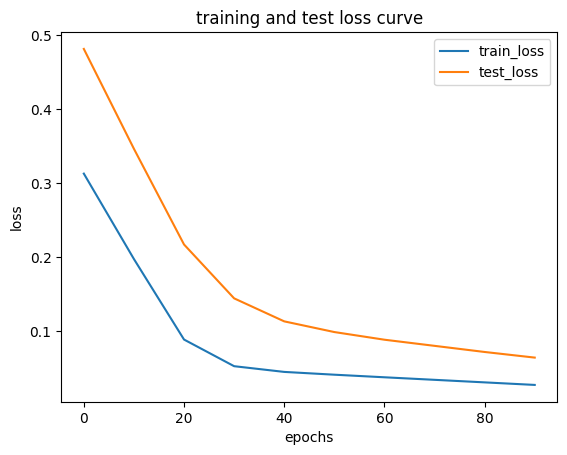

In [24]:
#plot loss curve
plt.plot(epoch_count, train_loss_value, label = 'train_loss')
plt.plot(epoch_count, test_loss_value, label = 'test_loss')
plt.title('training and test loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Making predictions with trained model

In [25]:
#1. eval mode
model_0.eval()
#2. Setup the inference mode context manager
with torch.inference_mode():
  #3. make sure the calculations are done with the model and data in the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

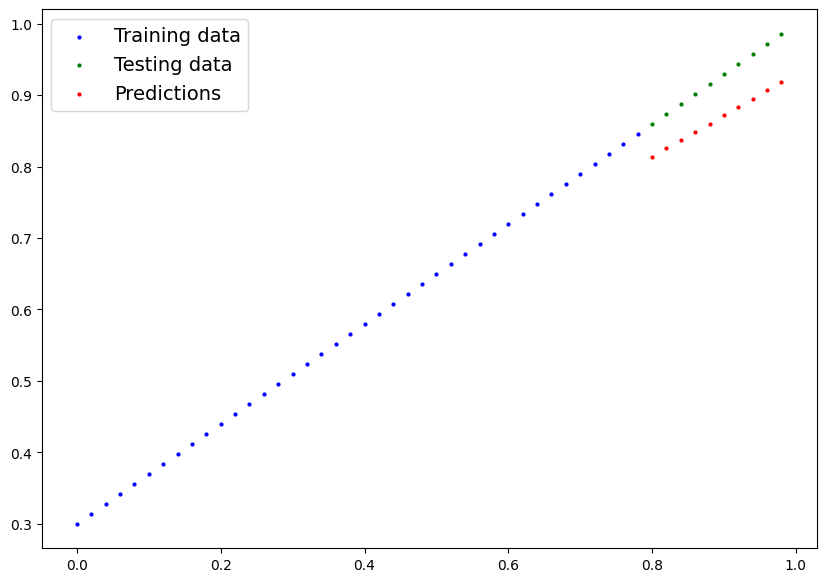

In [26]:
plot_predictions(predictions=y_preds)

#Saving and reloading the model

When saving a model for inference, it is only necessary to save the trained model’s learned parameters. Saving the model’s state_dict with the torch.save() function will give you the most flexibility for restoring the model later, which is why it is the recommended method for saving models.

A common PyTorch convention is to save models using either a .pt or .pth file extension.

Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

In [27]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH) # only saving the state_dict() only saves the models learned parameters

Saving model to: models/01_pytorch_workflow_model_0.pth


In [28]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Oct 25 03:53 models/01_pytorch_workflow_model_0.pth


#Loading a saved PyTorch model's state_dict()

In [29]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

#PyTorch inference rules
1. Set the model in evaluation mode (model.eval()).
2. Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).
3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

In [30]:
# 1. Put the loaded model into eval mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [31]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])